# Plotting maps with plotly

## Plain English summary

This notebook is a basic demo of using `plotly` to create the following map:

![Image of the map created in this notebook using plotly. All of the LSOAs in Devon and Cornwall are shown in random colours, and the locations of stroke units are marked.](example_map_plotly.png)

In the map, different areas are given different colours according to some dummy data value. The locations of some stroke units are also marked.

The notebook imports the following sets of data:

| File name | Type | Description |
| --- | --- | --- |
| `example_lsoa_englandwales.csv` | Table | A list of example data for all LSOAs in England and Wales. Each LSOA has a number from 1 to 10 in the "Value" column. This is meaningless dummy data. |
| `LSOA_regions.csv` | Table | A list of all LSOAs in England and Wales and the larger regions that they are parts of, e.g. Local Health Boards. |
| `stroke_hospitals_2022.csv` | Table | A list of stroke units in England and Wales. Their postcodes and coordinates in latitude and longitude are included. |
| `LSOA_(Dec_2011)_Boundaries_Super_Generalised_Clipped_(BSC)_EW_V3.geojson` | Coordinates | A list of coordinates defining the border of each LSOA in England and Wales. |

__Reference document:__ (?)

## Setup

Import the following packages:

In [1]:
import numpy as np
import pandas as pd

import json
import plotly.graph_objects as go

Look for data in these places:

In [2]:
paths = dict(
    dir_data_input = '../data_example/',
    dir_data_geojson = '../data_geojson/',
    dir_data_tabular = '../data_tabular/',
    values_file = 'example_lsoa_englandwales.csv',
    lsoa_geojson = 'LSOA_(Dec_2011)_Boundaries_Super_Generalised_Clipped_(BSC)_EW_V3.geojson',
    lsoa_regions = 'LSOA_regions.csv',
    stroke_hospitals = 'stroke_hospitals_2022.csv'
)

## Import example data

In [3]:
data_file = f"{paths['dir_data_input']}{paths['values_file']}"
lsoa_values = pd.read_csv(data_file)

In [4]:
lsoa_values.columns

Index(['LSOA11NM', 'Value'], dtype='object')

In [5]:
lsoa_values.index

RangeIndex(start=0, stop=34752, step=1)

In [6]:
lsoa_values.head(3)

LSOA11NM  Value
0  Adur 001A      1
1  Adur 001B      2
2  Adur 001C      3

## Import region coordinates

In [7]:
geojson_file =f"{paths['dir_data_geojson']}{paths['lsoa_geojson']}"

with open(geojson_file) as f:
    lsoa_gdf = json.load(f)

In [8]:
lsoa_gdf.keys()

dict_keys(['type', 'name', 'crs', 'features'])

## Import hospital locations

In [9]:
hospitals_file = f"{paths['dir_data_tabular']}{paths['stroke_hospitals']}"
hospitals_gdf = pd.read_csv(hospitals_file)

In [10]:
hospitals_gdf.columns

Index(['Postcode', 'Hospital_name', 'Use_IVT', 'Use_MT', 'Use_MSU', 'Country',
       'Strategic Clinical Network', 'Health Board / Trust', 'Stroke Team',
       'SSNAP name', 'Admissions 21/22', 'Thrombolysis', 'ivt_rate', 'Easting',
       'Northing', 'long', 'lat', 'Neuroscience',
       '30 England Thrombectomy Example', 'hospital_city', 'Notes'],
      dtype='object')

In [11]:
hospitals_gdf.index

RangeIndex(start=0, stop=141, step=1)

In [12]:
hospitals_gdf.head(3)

Postcode Hospital_name  Use_IVT  Use_MT  Use_MSU  Country  \
0   RM70AG        RM70AG        1       1        1  England   
1    E11BB         E11BB        1       1        1  England   
2   SW66SX        SW66SX        1       1        1  England   

  Strategic Clinical Network                   Health Board / Trust  \
0                 London SCN                                Barking   
1                 London SCN                 Barts Health NHS Trust   
2                 London SCN  Imperial College Healthcare NHS Trust   

                                         Stroke Team  \
0   Havering and Redbridge University Hospitals N...   
1                          The Royal London Hospital   
2                     Charing Cross Hospital, London   

                     SSNAP name  ...  Thrombolysis  ivt_rate  Easting  \
0  Queens Hospital Romford HASU  ...           117      11.9   551118   
1    Royal London Hospital HASU  ...           115      13.4   534829   
2   Charing Cross Hospital HASU  ...           113       9.9   524226   

   Northing      long        lat  Neuroscience  \
0    187780  0.179031  51.568647             1   
1    181798 -0.058133  51.519018             1   
2    176487 -0.212736  51.473717             1   

   30 England Thrombectomy Example  hospital_city Notes  
0                                0        Romford   NaN  
1                                1   Royal London   NaN  
2                                1  Charing Cross   NaN  

[3 rows x 21 columns]

## Limit region info to just Devon and Cornwall

Read in this file of region information for each LSOA. It includes the following data:

| Column name | Description | Usage |
| --- | --- | --- | 
| LSOA11 CD / NM | LSOA 2011 codes / names | England & Wales |
| long / lat | Longitude and latitude of the centroid of the LSOA | England & Wales |
| CCG19 CD / NM | Clinical Commissioning Groups 2019 codes / names | England |
| ICB22 CD / NM | Integrated Care Board 2022 codes / names. Replacement for CCGs. | England |
| STP19 CD / NM | Sustainability and Transformation Partnerships codes / names (~similar to counties) | England |
| LHB20 CD / NM / NMW | Local Health Boards 2020 codes / names / Welsh names | Wales |
| RGN11 CD / NM | Region codes / names. Gives specific regions within England, but Wales and Scotland just get the country name. | England & Wales |
| LAD17 CD / NM | Local Authority District 2017 codes / names | England & Wales |
| SCN17 CD/NM | Strategic Clinical Network 2017 codes / names | England |

In [13]:
region_file = f"{paths['dir_data_tabular']}{paths['lsoa_regions']}"
lsoa_regions = pd.read_csv(region_file)

In [14]:
lsoa_regions.columns

Index(['LSOA11CD', 'LSOA11NM', 'LSOA11LONG', 'LSOA11LAT', 'CCG19CD', 'CCG19NM',
       'STP19CD', 'STP19NM', 'LHB20CD', 'LHB20NM', 'LHB20NMW', 'LAD17CD',
       'LAD17NM', 'SCN17CD', 'SCN17NM', 'RGN11CD', 'RGN11NM'],
      dtype='object')

In [15]:
lsoa_regions.index

RangeIndex(start=0, stop=34752, step=1)

Only keep rows of data that belong to "Devon" and "Cornwall and the Isles of Scilly":

In [16]:
mask = (
    (lsoa_regions['STP19NM'] == 'Devon') |
    (lsoa_regions['STP19NM'] == 'Cornwall and the Isles of Scilly')
    )

lsoa_regions = lsoa_regions[mask]

In [17]:
lsoa_regions.head(3)

LSOA11CD       LSOA11NM  LSOA11LONG  LSOA11LAT    CCG19CD  \
7627  E01018936  Cornwall 001A    -4.54490   50.83088  E38000089   
7628  E01018937  Cornwall 001B    -4.53209   50.82460  E38000089   
7629  E01018938  Cornwall 001C    -4.54316   50.81845  E38000089   

             CCG19NM    STP19CD                           STP19NM LHB20CD  \
7627  NHS Kernow CCG  E54000036  Cornwall and the Isles of Scilly     NaN   
7628  NHS Kernow CCG  E54000036  Cornwall and the Isles of Scilly     NaN   
7629  NHS Kernow CCG  E54000036  Cornwall and the Isles of Scilly     NaN   

     LHB20NM LHB20NMW    LAD17CD   LAD17NM    SCN17CD     SCN17NM    RGN11CD  \
7627     NaN      NaN  E06000052  Cornwall  E55000009  South West  E12000009   
7628     NaN      NaN  E06000052  Cornwall  E55000009  South West  E12000009   
7629     NaN      NaN  E06000052  Cornwall  E55000009  South West  E12000009   

         RGN11NM  
7627  South West  
7628  South West  
7629  South West

### Limit example data

Limit the list of LSOAs with data values for the colour map to just Devon and Cornwall:

In [18]:
lsoa_values = pd.merge(
    lsoa_values, lsoa_regions['LSOA11NM'],
    left_on='LSOA11NM', right_on='LSOA11NM'
)

In [19]:
lsoa_values.head(3)

LSOA11NM  Value
0  Cornwall 001A      8
1  Cornwall 001B      9
2  Cornwall 001C     10

### Limit region coordinates

Reduce the big coordinates file to just the selected Devon and Cornwall:

In [20]:
features_to_keep = []

for f, feature in enumerate(lsoa_gdf['features']):
    lsoa_name = feature['properties']['LSOA11NM']
    if lsoa_name in lsoa_values['LSOA11NM'].values:
        features_to_keep.append(feature)

lsoa_gdf['features'] = features_to_keep

In [21]:
len(lsoa_gdf['features'])

1033

### Limit hospital locations

Limit hospital data to those in Devon and Cornwall.

Here the hospital postcodes have been picked out manually.

In [22]:
hospitals_in_region = [
    'EX314JB',
    'PL68DH',
    'TR13LQ',
    'EX25DW',
    'TQ27AA',
    ]
mask = hospitals_gdf['Postcode'].isin(hospitals_in_region)
hospitals_gdf = hospitals_gdf[mask]

In [23]:
hospitals_gdf.head(3)

Postcode Hospital_name  Use_IVT  Use_MT  Use_MSU  Country  \
104  EX314JB       EX314JB        1       0        0  England   
105   PL68DH        PL68DH        1       1        1  England   
106   TR13LQ        TR13LQ        1       0        0  England   

    Strategic Clinical Network                 Health Board / Trust  \
104             South West SCN  Northern Devon Healthcare NHS Trust   
105             South West SCN         Plymouth Hospitals NHS Trust   
106             South West SCN   Royal Cornwall Hospitals NHS Trust   

                                   Stroke Team                     SSNAP name  \
104  North Devon District Hospital, Barnstaple  North Devon District Hospital   
105               Derriford Hospital, Plymouth             Derriford Hospital   
106             Royal Cornwall Hospital, Truro        Royal Cornwall Hospital   

     ...  Thrombolysis  ivt_rate  Easting  Northing      long        lat  \
104  ...            44      11.1   256506    134540 -4.050431  51.092169   
105  ...            78      10.2   249930     59564 -4.113684  50.416720   
106  ...            57       6.5   179581     45313 -5.094263  50.266557   

     Neuroscience  30 England Thrombectomy Example  hospital_city Notes  
104             0                                0     Barnstaple   NaN  
105             1                                1       Plymouth   NaN  
106             0                                0          Truro   NaN  

[3 rows x 21 columns]

## Create the map

The following cells are specific to this map type.

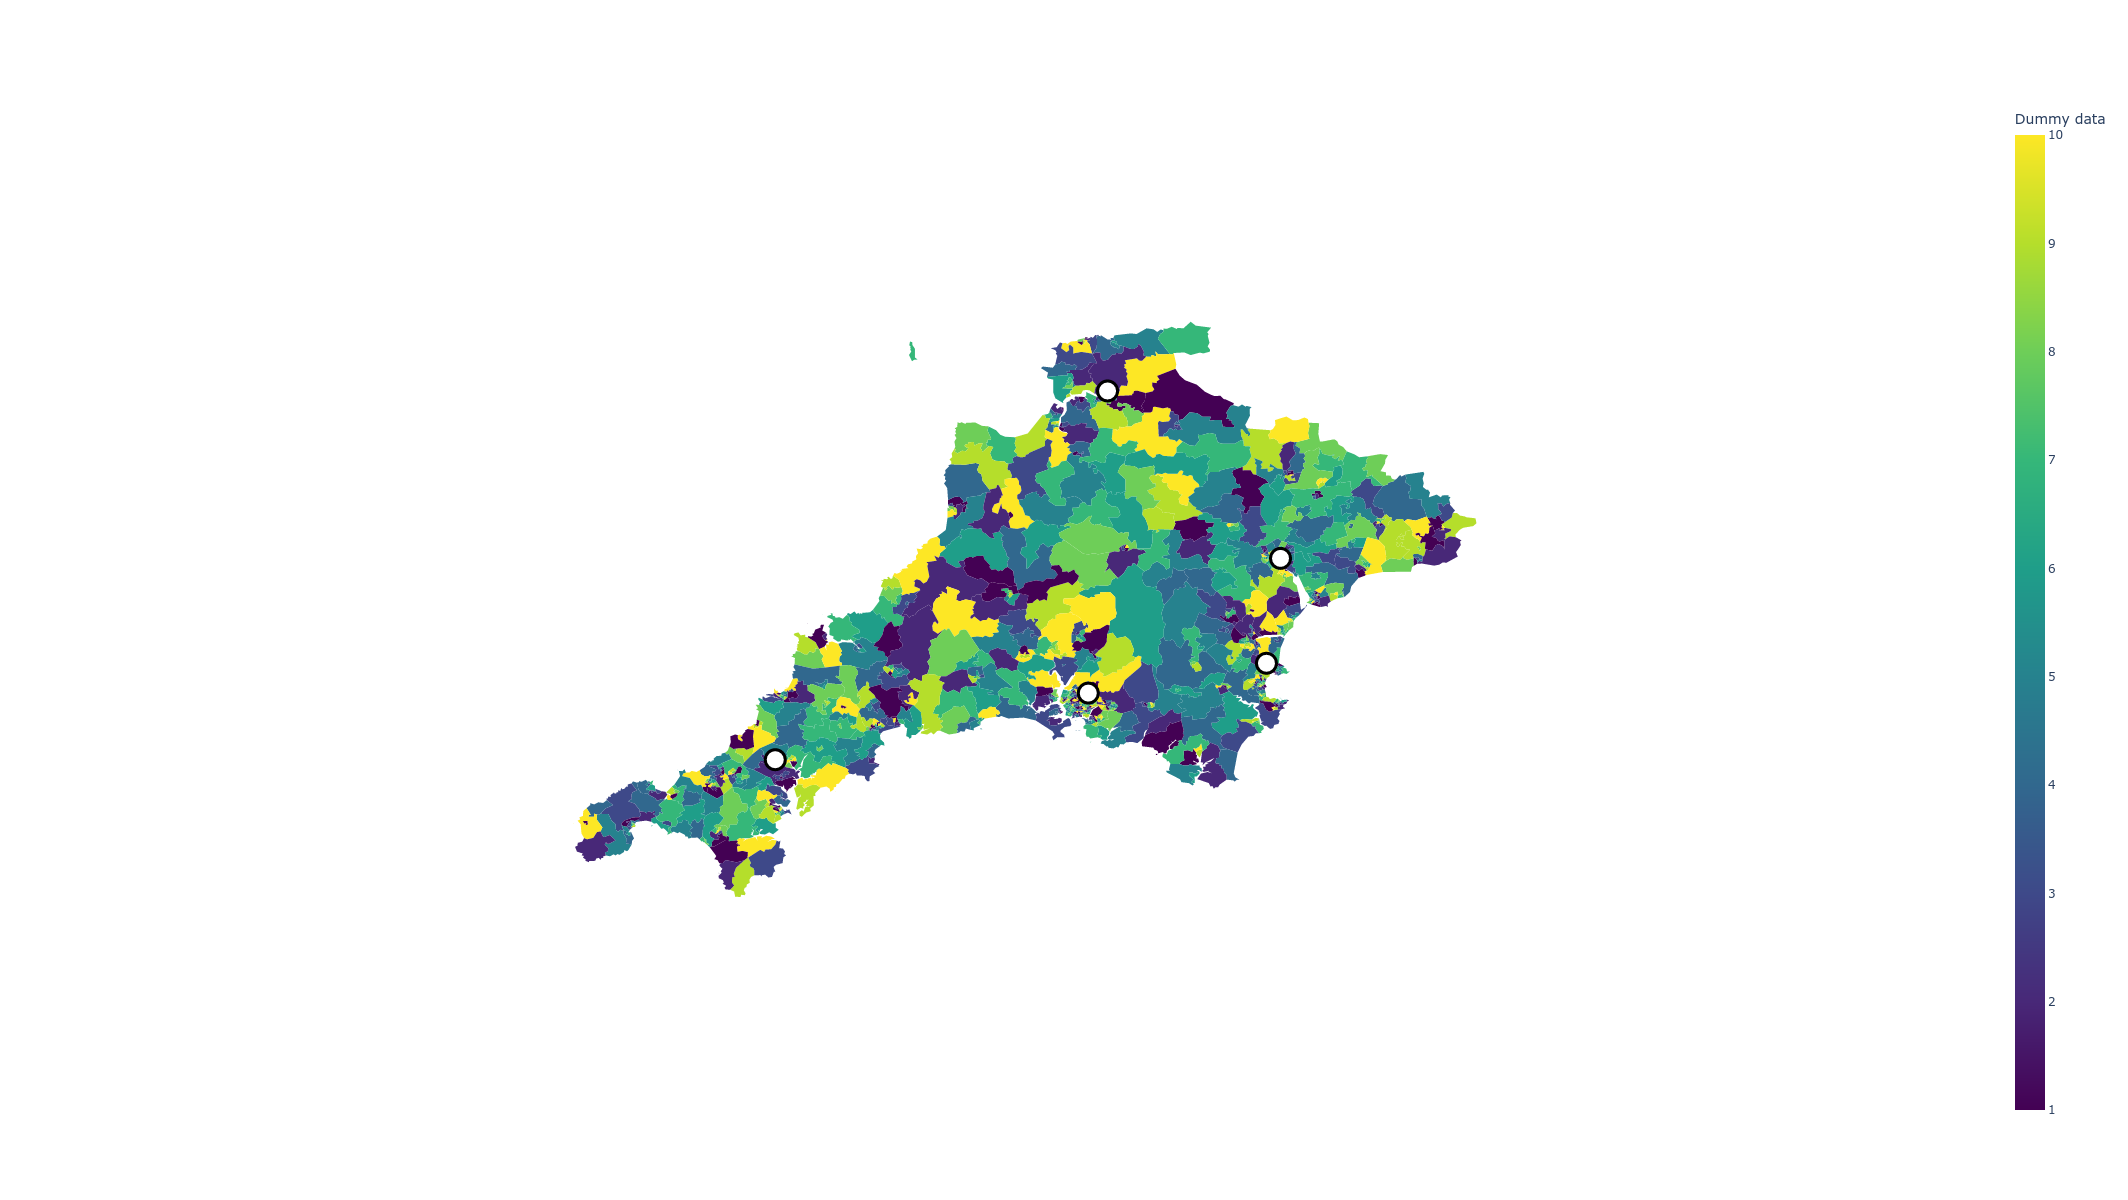

In [62]:
range = max(np.abs(np.max(lsoa_values['Value'])),
            np.abs(np.min(lsoa_values['Value'])))

fig = go.Figure()
fig.update_layout(
    width=1200,
    height=1200
    )

# Draw the colour areas:
fig.add_trace(go.Choropleth(
    geojson=lsoa_gdf,
    locations=lsoa_values['LSOA11NM'],
    z=lsoa_values['Value'],
    featureidkey='properties.LSOA11NM',
    coloraxis="coloraxis",
    # colorscale='viridis',
    # autocolorscale=False
))

# Change the projection:
fig.update_layout(
    geo = dict(
        scope='world',
        projection=go.layout.geo.Projection(type = 'airy'),
        fitbounds='locations',
        visible=False
))
# Remove LSOA borders:
fig.update_traces(marker_line_width=0, selector=dict(type='choropleth'))

# Update colour scale:
fig.update_layout(
    coloraxis_colorscale='Viridis',
    coloraxis_colorbar_title_text='Dummy data',
    # coloraxis_cmin=-range,
    # coloraxis_cmax=range,
    )

# Make LSOA name appear on hover:
fig.update_traces(hovertemplate='%{z}<extra>%{location}</extra>', selector=dict(type='choropleth'))

# Add hospital markers:
fig.add_trace(go.Scattergeo(
    lon=hospitals_gdf['long'],
    lat=hospitals_gdf['lat'],
    customdata=np.stack(hospitals_gdf['Hospital_name'].values, axis=-1),
    marker_color='white',
    marker_size=20,
    marker_line=dict(color='black', width=3)
))
# Make hospital name appear on hover:
fig.update_traces(
    hovertemplate='%{customdata}<extra></extra>',
    selector=dict(type='scattergeo')
)

# fig.write_html('data_maps/plotly_test.html')
fig.show()